## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [303]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn scikit-learn sklearn-pandas -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [304]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [305]:
# Loading the dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [306]:
loan_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Loan_Modelling.csv")

In [307]:
# copying data to another varaible to avoid any changes to original data
data = loan_dataset.copy()

## Data Overview

### View the first and last 5 rows of the dataset.

In [308]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [309]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Understand the shape of the dataset.

In [310]:
data.shape

(5000, 14)

### Check the data types of the columns for the dataset.

In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Checking for missing values

In [312]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


#### Dropping the duplicate values

In [313]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

#### Dropping the columns with all unique values

In [314]:
# checking for unique values in ID column
data["ID"].nunique()

5000

* Since all the values in ID column are unique we can drop it

In [315]:
data.drop(["ID"], axis=1, inplace=True)

### Statistical summary of the dataset.

In [316]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


**Observations**

The dataset consists of 5,000 records and 14 variables related to customer demographics, financial details, and personal loan acceptance. Out of which we have dropped "ID" and key variables include:



1.   **Numerical Variables**:Age, Experience, Income, CCAvg (credit card average spending), Mortgage.
2.   **Categorical/Binary Variables**:Family (number of family members), Education (levels 1-3), Personal Loan (target variable), ZipCode, Securities Account, CD Account, Online Banking, Credit Card Ownership.



### Feature Engineering

The features include:
1. **Numerical variables**: Age, Experience, Income, CCAvg, Mortgage.
2. **Categorical/Nominal variables**: Family, Education.
3. **Binary variables:** Personal_Loan (target), Securities_Account, CD_Account, Online, CreditCard.
4. **ID and ZIPCode** seem unnecessary for modeling.

Potential issues to check:

1. **Outliers** in numerical features. We can use IQR-based capping for Income, CCAvg, and Mortgage.
2. **Experience**: Should be positive we should verify if there are negative values.


In [317]:
# Check for negative values in Experience
negative_experience = data[data["Experience"] < 0]
print("Number of negative values in Experience:", negative_experience.shape[0])

Number of negative values in Experience: 52


In [401]:
# Fix negative Experience values by taking absolute values
data["Experience"] = data["Experience"].abs()

In [318]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [319]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [320]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

## Exploratory Data Analysis.

### Univariate Analysis

In [321]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [322]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Mortgage

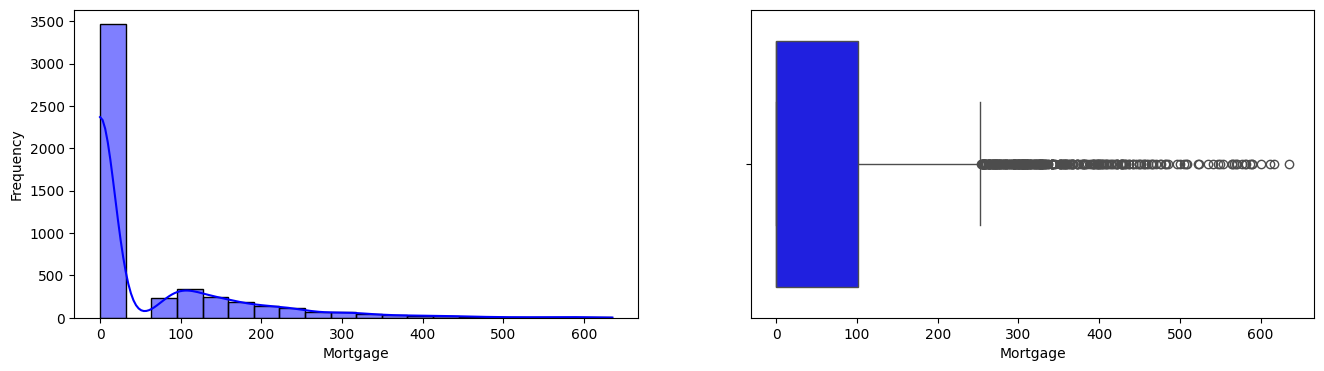

In [323]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.histplot(data=data,x='Mortgage', bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_xlabel("Mortgage")
axes[0].set_ylabel("Frequency")
sns.boxplot(data=data,x='Mortgage', ax=axes[1],color="blue")
axes[1].set_xlabel("Mortgage")
plt.show()

**Observations:**



1.  The mortgage is right skewed meaning most customers have no mortage or less that $100K.

2.  A smaller percentage has mortgages up to $600K.
3. The mortgage amounts are mostly concentrated around lower values, with a long tail indicates some high-value outliers.



#### Observations on Credit Cards

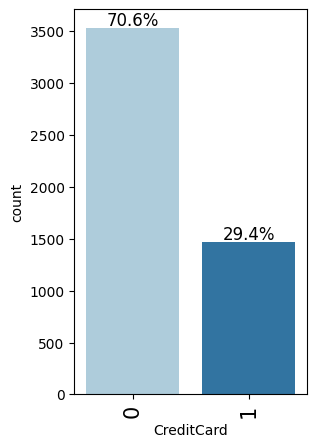

In [324]:
labeled_barplot(data=data, feature="CreditCard", perc=True)

**Observations:**



1.  70.6% people do not have credit card and only 29.4% have credit cards.

#### Observations on Age

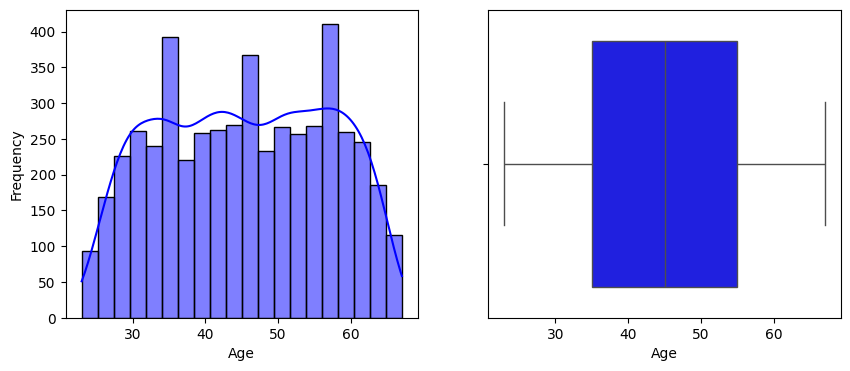

In [325]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data=data,x='Age', bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")
sns.boxplot(data=data,x='Age', ax=axes[1],color="blue")
axes[1].set_xlabel("Age")
plt.show()

**Observations:**

1.   The distribution is fairly normal, with most customers between 30-60 years old.
2.  Very few customers are below 25 or above 65.

#### Observations on Education

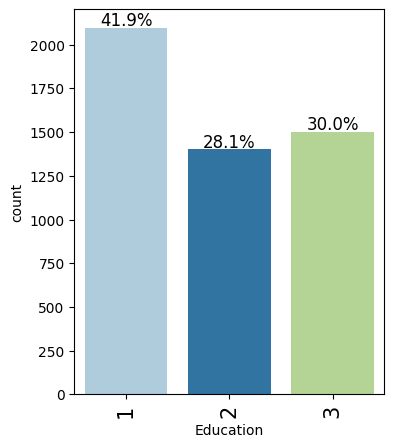

In [326]:
labeled_barplot(data, "Education", perc=True)

**Observations:**
1. Most customers have education level 1 or 3, while fewer have level 2.

#### Observations on Family

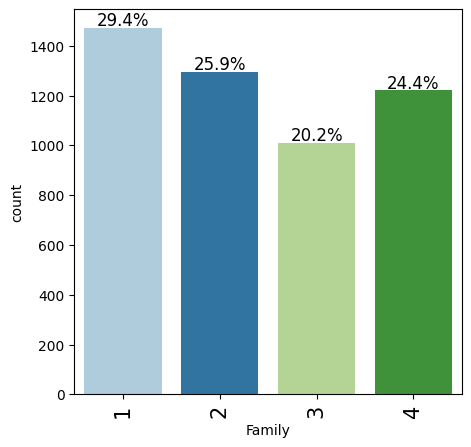

In [327]:
labeled_barplot(data, "Family", perc=True)

***Observations:***

1. Most customers have families of size 1,2 or 4.

#### Observations on CD_Account

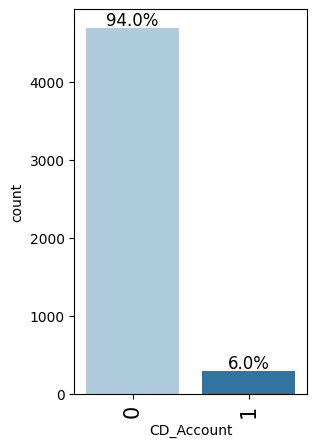

In [328]:
labeled_barplot(data, "CD_Account", perc=True)

**Observations**

1.  Very few customers ~6% own a CD (Certificate of Deposit) account.

#### Observations on Securities_Account

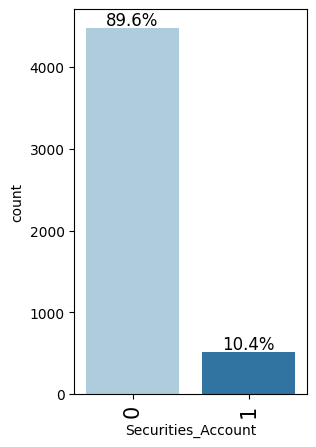

In [329]:
labeled_barplot(data, "Securities_Account", perc=True)

**Observations**

1. Most customers do not have a securities account.

#### Observations on Online

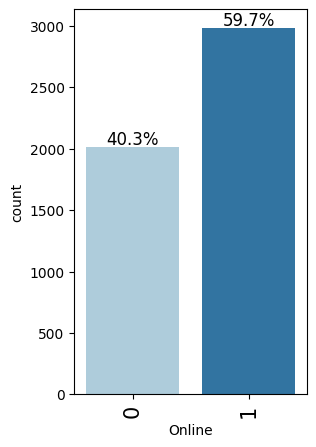

In [330]:
labeled_barplot(data, "Online", perc=True)

**Observations:**

1. A majority of customers use online banking.

#### Observations on Personal Loan

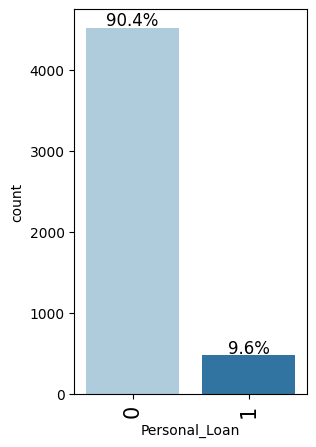

In [331]:
labeled_barplot(data, "Personal_Loan", perc=True)

**Observations:**
1.  Majority (~90%) did not take a loan.
2.  Minority (~10%) accepted the loan offer.

#### Observations on CCAvg

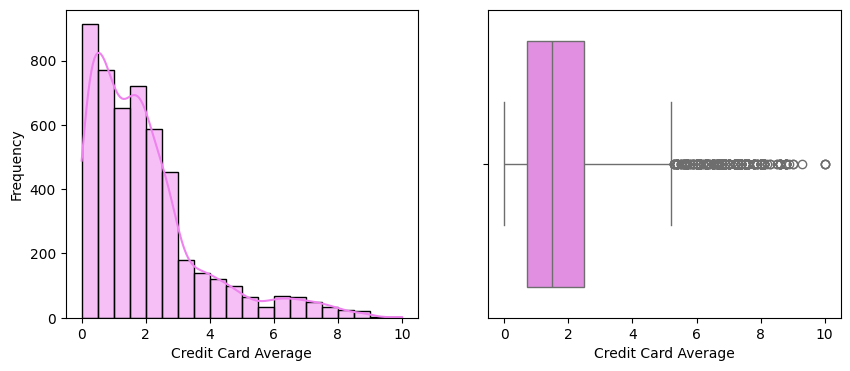

In [332]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data=data,x='CCAvg', bins=20, kde=True, color="violet", ax=axes[0])
axes[0].set_xlabel("Credit Card Average")
axes[0].set_ylabel("Frequency")
sns.boxplot(data=data,x='CCAvg', ax=axes[1],color="violet")
axes[1].set_xlabel("Credit Card Average")
plt.show()

**Observations:**

1.  The Credit Card Average is a right skewed distribution indicating most customers expenditure is on the lower end.
2.  Most customers spend less than 5K dollars monthly on credit cards.
3.  Few customers spend above 8K dollars indicating high spenders.

#### Observations on Experience

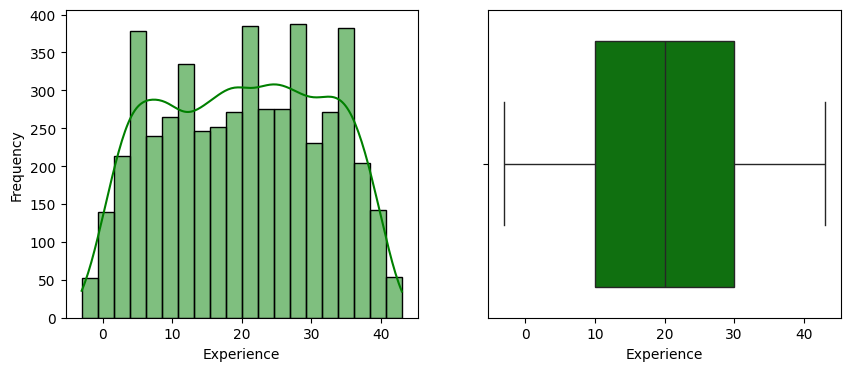

In [333]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data=data,x='Experience', bins=20, kde=True, color="green", ax=axes[0])
axes[0].set_xlabel("Experience")
axes[0].set_ylabel("Frequency")
sns.boxplot(data=data,x='Experience', ax=axes[1],color="green")
axes[1].set_xlabel("Experience")
plt.show()

**Observations:**
1. No clear distinction between those who take loans and those who don’t because the distribution is fairly even.

#### Observations on Income

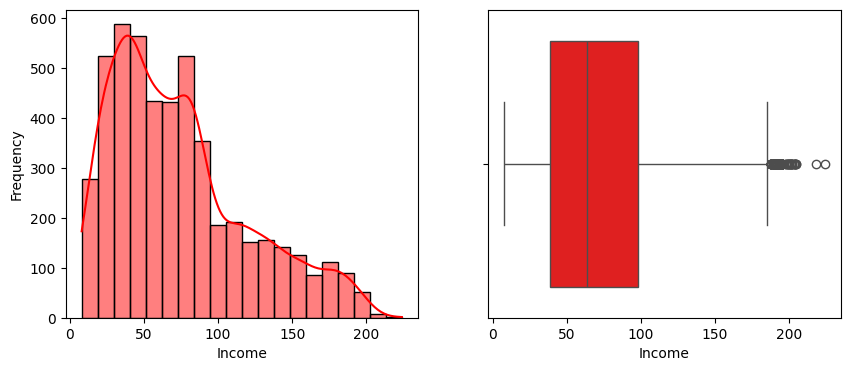

In [334]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data=data,x='Income', bins=20, kde=True, color="red", ax=axes[0])
axes[0].set_xlabel("Income")
axes[0].set_ylabel("Frequency")
sns.boxplot(data=data,x='Income', ax=axes[1],color="red")
axes[1].set_xlabel("Income")
plt.show()

**Observations:**



1.   The income is a Right-skewed distribution.
2.   Most customers earn between $0-$100K per year.
3.   A small proportion earns above $150K, indicating wealthier clients.



#### Observations on ZipCode

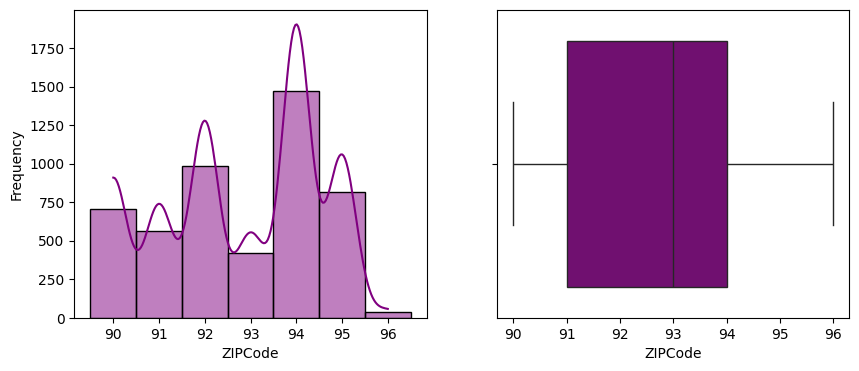

In [335]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data=data,x='ZIPCode', bins=20, kde=True, color="purple", ax=axes[0])
axes[0].set_xlabel("ZIPCode")
axes[0].set_ylabel("Frequency")
sns.boxplot(data=data,x='ZIPCode', ax=axes[1],color="purple")
axes[1].set_xlabel("ZIPCode")
plt.show()

### Bivariate Analysis

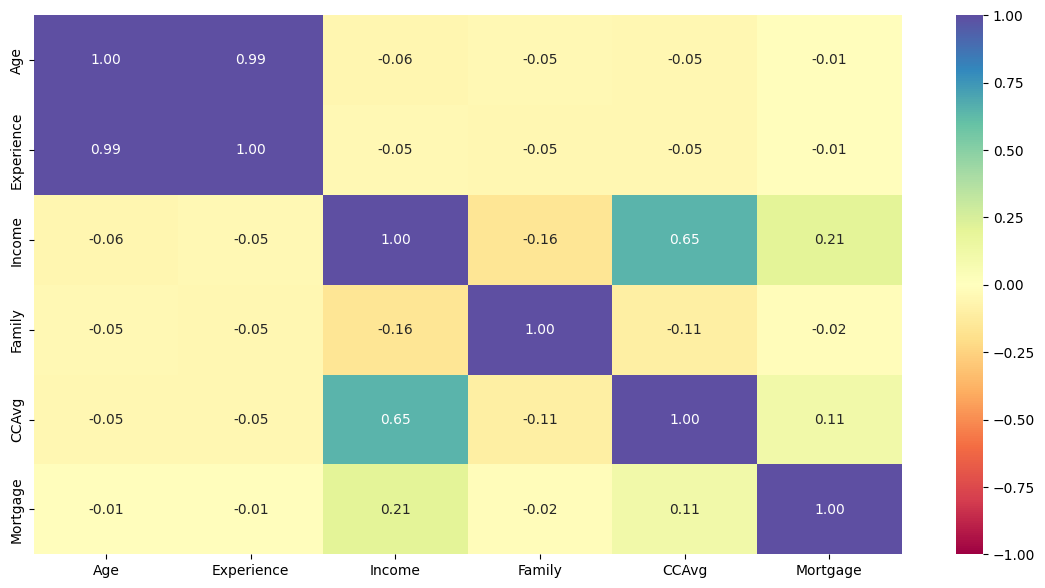

In [336]:
#Heatmap to visualize the correlation between variables
plt.figure(figsize=(14, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**

1. **Age & Experience**: No clear distinction between those who take loans and those who don’t.
2. **Income**: Higher-income individuals are more likely to take personal loans.
3. **Family**: Families with 3-4 members seem more likely to take loans.
4. **CCAvg**: Higher credit card spending correlates with higher loan acceptance.
5. **Education**: Customers with education level 3 (higher education) are more likely to take loans.
6. **Mortgage**: Those with high mortgage amounts have a slightly higher probability of taking loans.


In [337]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [338]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Observations on ZipCode Vs Personal Loan

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


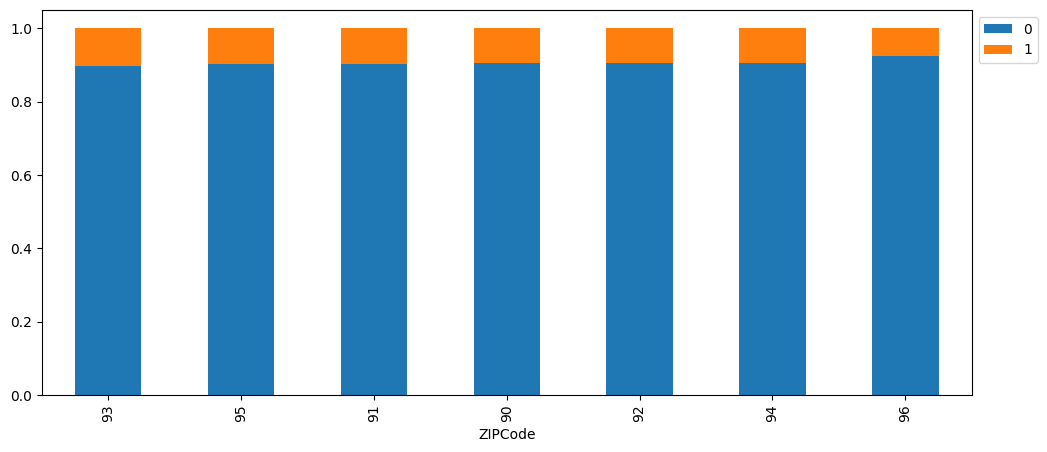

In [390]:
stacked_barplot(data, "ZIPCode","Personal_Loan");

**Observations**

1. The ZipCode seems to be fairly uniform when it comes to Personal Loan acceptance.

#### Observations on Age Vs Personal Loan

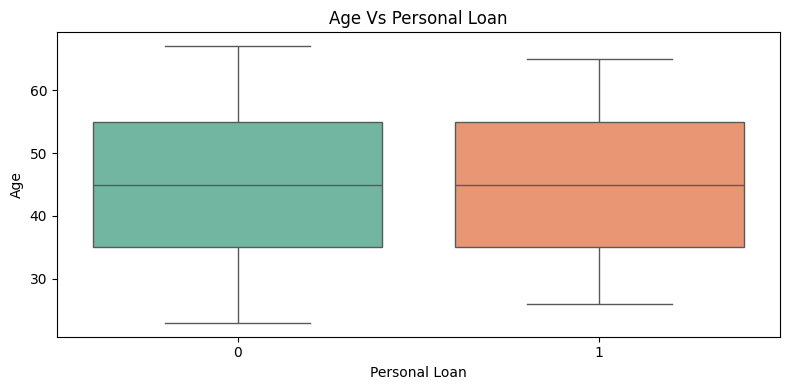

In [339]:
# Create a boxplot with 'rating' on the x-axis and 'cost_of_the_order' on the y-axis
plt.figure(figsize=(8, 4))
sns.boxplot(y='Age', x='Personal_Loan', data=data, palette='Set2')

# Customize the plot
plt.title('Age Vs Personal Loan')
plt.ylabel('Age')
plt.xlabel('Personal Loan')
plt.tight_layout()
plt.show()


**Observations:**

1. No strong correlation between age and loan acceptance.
2. Customers across all age groups accept loans at similar rates.

#### Observations on Experience Vs Personal Loan

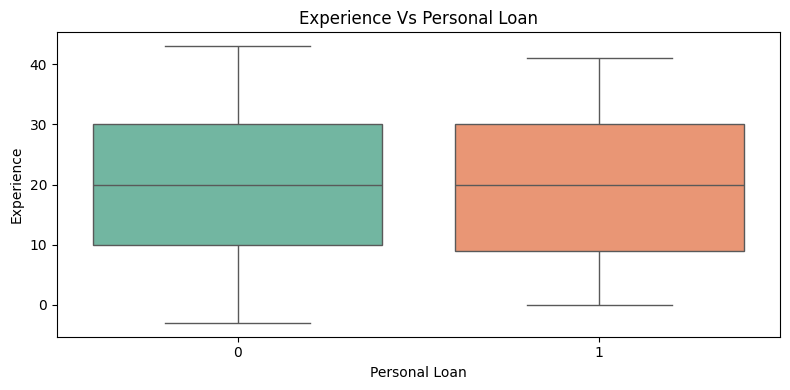

In [340]:
# Create a boxplot with 'rating' on the x-axis and 'cost_of_the_order' on the y-axis
plt.figure(figsize=(8, 4))
sns.boxplot(y='Experience', x='Personal_Loan', data=data, palette='Set2')

# Customize the plot
plt.title('Experience Vs Personal Loan')
plt.ylabel('Experience')
plt.xlabel('Personal Loan')
plt.tight_layout()
plt.show()


**Observations:**
1. Similar to Age, no clear trend is visible.
2. Experience does not seem to affect loan acceptance significantly.

#### Observations on Income Vs Personal Loan

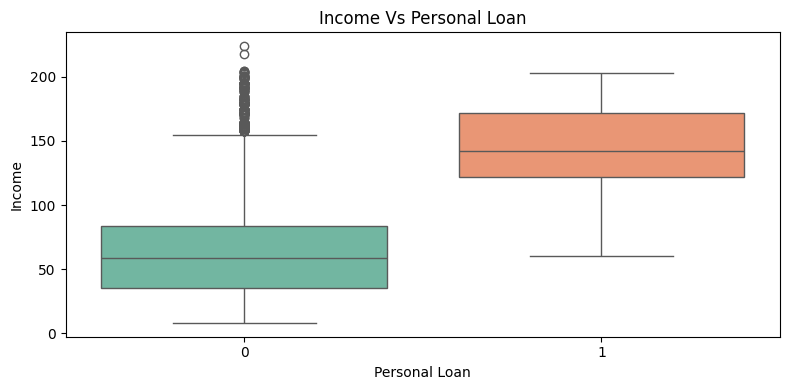

In [341]:
# Create a boxplot with 'rating' on the x-axis and 'cost_of_the_order' on the y-axis
plt.figure(figsize=(8, 4))
sns.boxplot(y='Income', x='Personal_Loan', data=data, palette='Set2')

# Customize the plot
plt.title('Income Vs Personal Loan')
plt.ylabel('Income')
plt.xlabel('Personal Loan')
plt.tight_layout()
plt.show()


**Observations:**
1. Higher-income individuals are more likely to take loans.

2. Those earning more than 100K dollars have a much higher loan acceptance rate than those earning less than $50K.

#### Observations on Family Vs Personal Loan

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


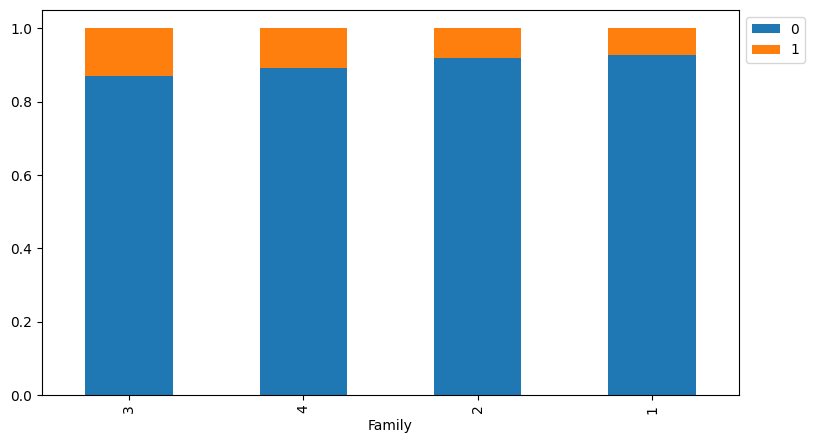

In [342]:
stacked_barplot(data, "Family","Personal_Loan");

**Observations:**

1. Customers with 3-4 family members are more likely to take loans than those with 1-2 family members.
2. Single individuals or those with smaller families have lower acceptance rates.

#### Observations on CCAvg Vs Personal Loan

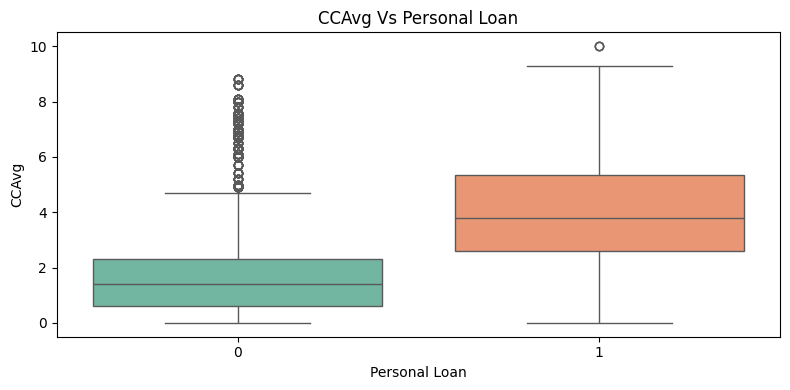

In [343]:
# Create a boxplot with 'rating' on the x-axis and 'cost_of_the_order' on the y-axis
plt.figure(figsize=(8, 4))
sns.boxplot(y='CCAvg', x='Personal_Loan', data=data, palette='Set2')

# Customize the plot
plt.title('CCAvg Vs Personal Loan')
plt.ylabel('CCAvg')
plt.xlabel('Personal Loan')
plt.tight_layout()
plt.show()


**Observations:**
1. Higher spending customers (>5K/month) are more likely to take a loan.
2. Those with very low credit card spending (<1K) rarely take loans.

#### Observations on Education Vs Personal Loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


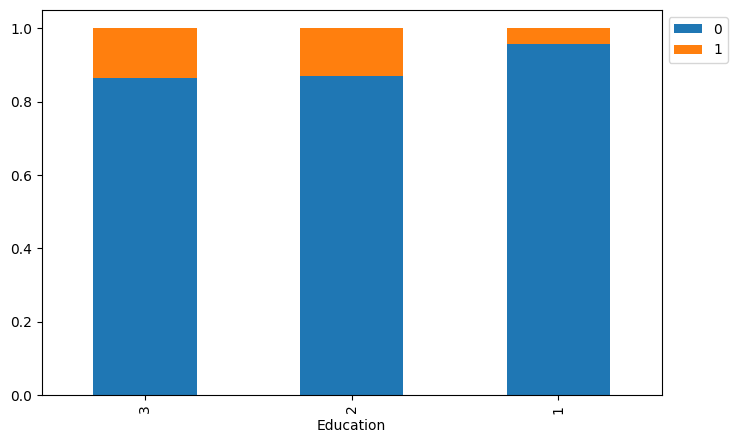

In [344]:
stacked_barplot(data, "Education", "Personal_Loan")

**Observations:**

1. Higher education level (level 3 - professional/advanced degree) correlates with higher loan acceptance.
2. Customers with only undergraduate education (level 1) rarely accept loans.

#### Observations on Mortgage Vs Personal Loan

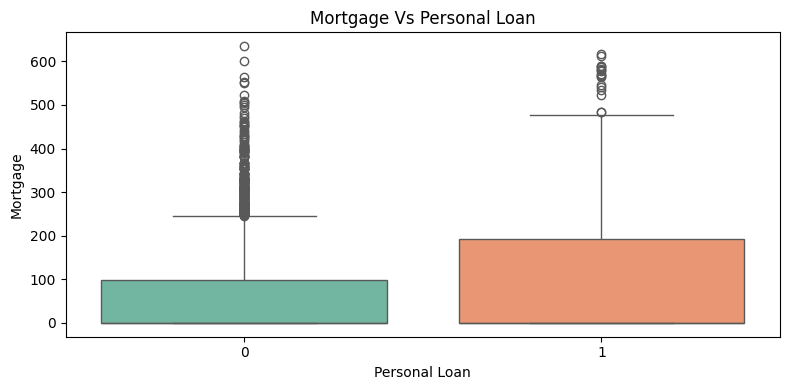

In [345]:
# Create a boxplot with 'rating' on the x-axis and 'cost_of_the_order' on the y-axis
plt.figure(figsize=(8, 4))
sns.boxplot(y='Mortgage', x='Personal_Loan', data=data, palette='Set2')

# Customize the plot
plt.title('Mortgage Vs Personal Loan')
plt.ylabel('Mortgage')
plt.xlabel('Personal Loan')
plt.tight_layout()
plt.show()

**Observations:**
1. Customers with no mortgage are more likely to decline loans.
2. However, those with high mortgages (above 200K) show slightly higher acceptance rates.

#### Observations on Securities Account Vs Personal Loan

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


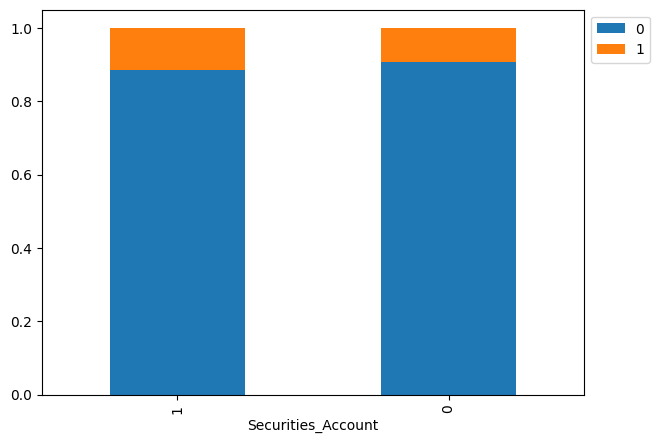

In [346]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

**Observations:**

1. Customers with securities accounts rarely take loans.
2. Suggests that financially stable customers with investments may not need personal loans.

#### Observations on CD_Account Vs Personal Loan

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


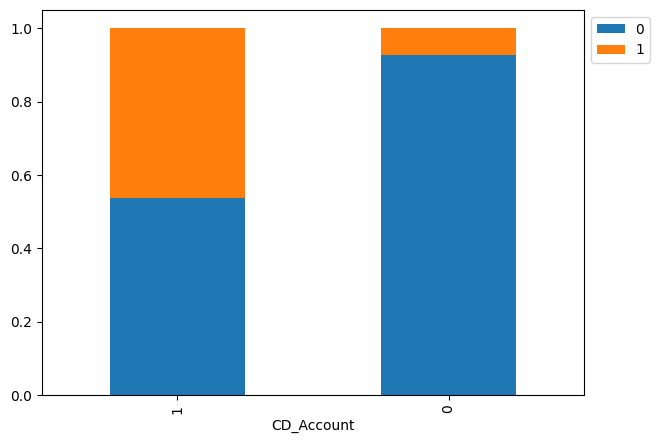

In [347]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

**Observations:**

**Strong correlation:**
1. Customers who own a CD account are far more likely to take a loan.
2. Possible reason: CD holders have a financial history and may have better trust from the bank.

#### Observations on Online Banking Vs Personal Loan

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


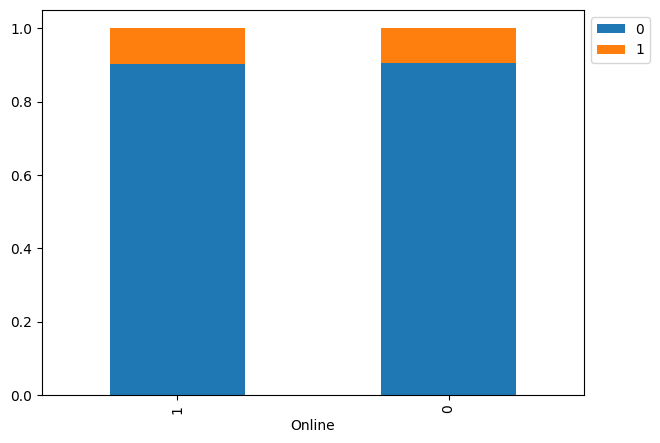

In [348]:
stacked_barplot(data, "Online", "Personal_Loan")

**Observations:**

1. No strong relationship between online banking users and loan acceptance.
2. Both online and offline customers take loans at similar rates.

#### Observations on Credit Card Vs Personal Loan

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


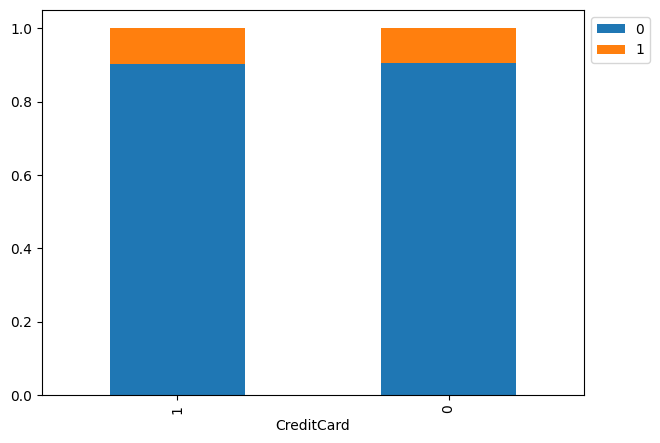

In [349]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

**Observations;**

**Slight positive correlation:**
1. Customers with credit cards are slightly more likely to accept loans than those without.
2. Possible reason: Banks might be targeting active credit users for loan offers.

## Data Preprocessing

###Outlier Treatment

In [350]:
# Outlier treatment using IQR for Income, CCAvg, and Mortgage
def iqr_capping(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

data["Income"] = iqr_capping(data["Income"])
data["CCAvg"] = iqr_capping(data["CCAvg"])
data["Mortgage"] = iqr_capping(data["Mortgage"])

# Verify changes
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.617400,45.626122,8.0,39.0,64.0,98.0,186.5
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.831338,1.452215,0.0,0.7,1.5,2.5,5.2
Mortgage,5000.0,50.494700,83.005401,0.0,0.0,0.0,101.0,252.5


**Observations:**

1. **Negative Experience Fixed**: All negative values have been converted to absolute values.
2. **Outliers Treated**:
   *   Income capped at 186.5K (previously 224K).
   *   CCAvg capped at 5.2K (previously 10K).
   *  Mortgage capped at 252.5K (previously 635K).





## Model Building

### Data Preparation


In [351]:
# Split data into features and target variable
X = data.drop(columns=["Personal_Loan"])
y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4000, 18), (1000, 18), (4000,), (1000,))

**Observations:**

The dataset has been split into:

1. Training set: 4,000 samples
2. Testing set: 1,000 samples
3. Features: 18

In [352]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [353]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### **Default Decision Tree**

In [354]:
# creating an instance of the decision tree model
dtree1 = DecisionTreeClassifier(random_state=42)    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

##### **Check Performance on the training data**

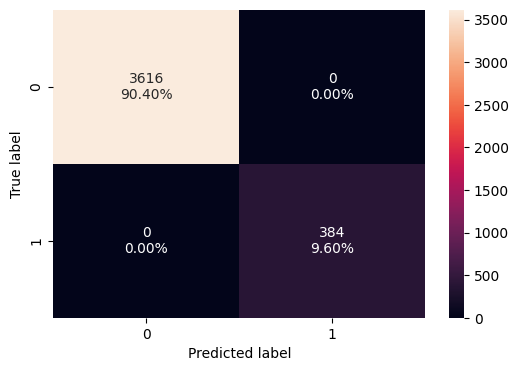

In [355]:
plot_confusion_matrix(dtree1, X_train, y_train)

**Observations:**

The confusion matrix also confirms a sign of potential overfitting.

In [356]:
dtree1_train_perf = model_performance_classification(dtree1, X_train, y_train)

dtree1_train_perf = dtree1_train_perf.rename(index={0: 'Decision Tree (Train)'})
dtree1_train_perf

,Accuracy,Recall,Precision,F1 Score
Decision Tree (Train),1.0,1.0,1.0,1.0


##### **Check Performance on the test data**

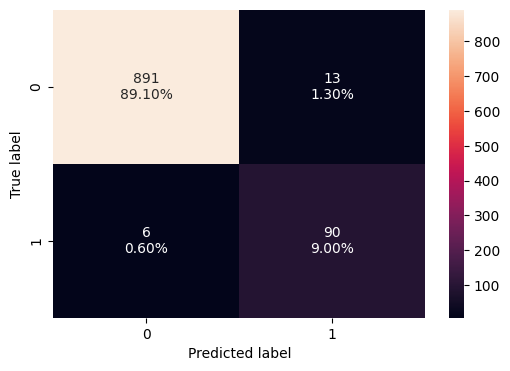

In [357]:
plot_confusion_matrix(dtree1, X_test, y_test)

In [358]:
dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
# Rename the index for the test performance DataFrame.
dtree1_test_perf = dtree1_test_perf.rename(index={0: 'Decision Tree (Test)'})
dtree1_test_perf


,Accuracy,Recall,Precision,F1 Score
Decision Tree (Test),0.981,0.9375,0.873786,0.904523


##### **Visualizing the Decision Tree**

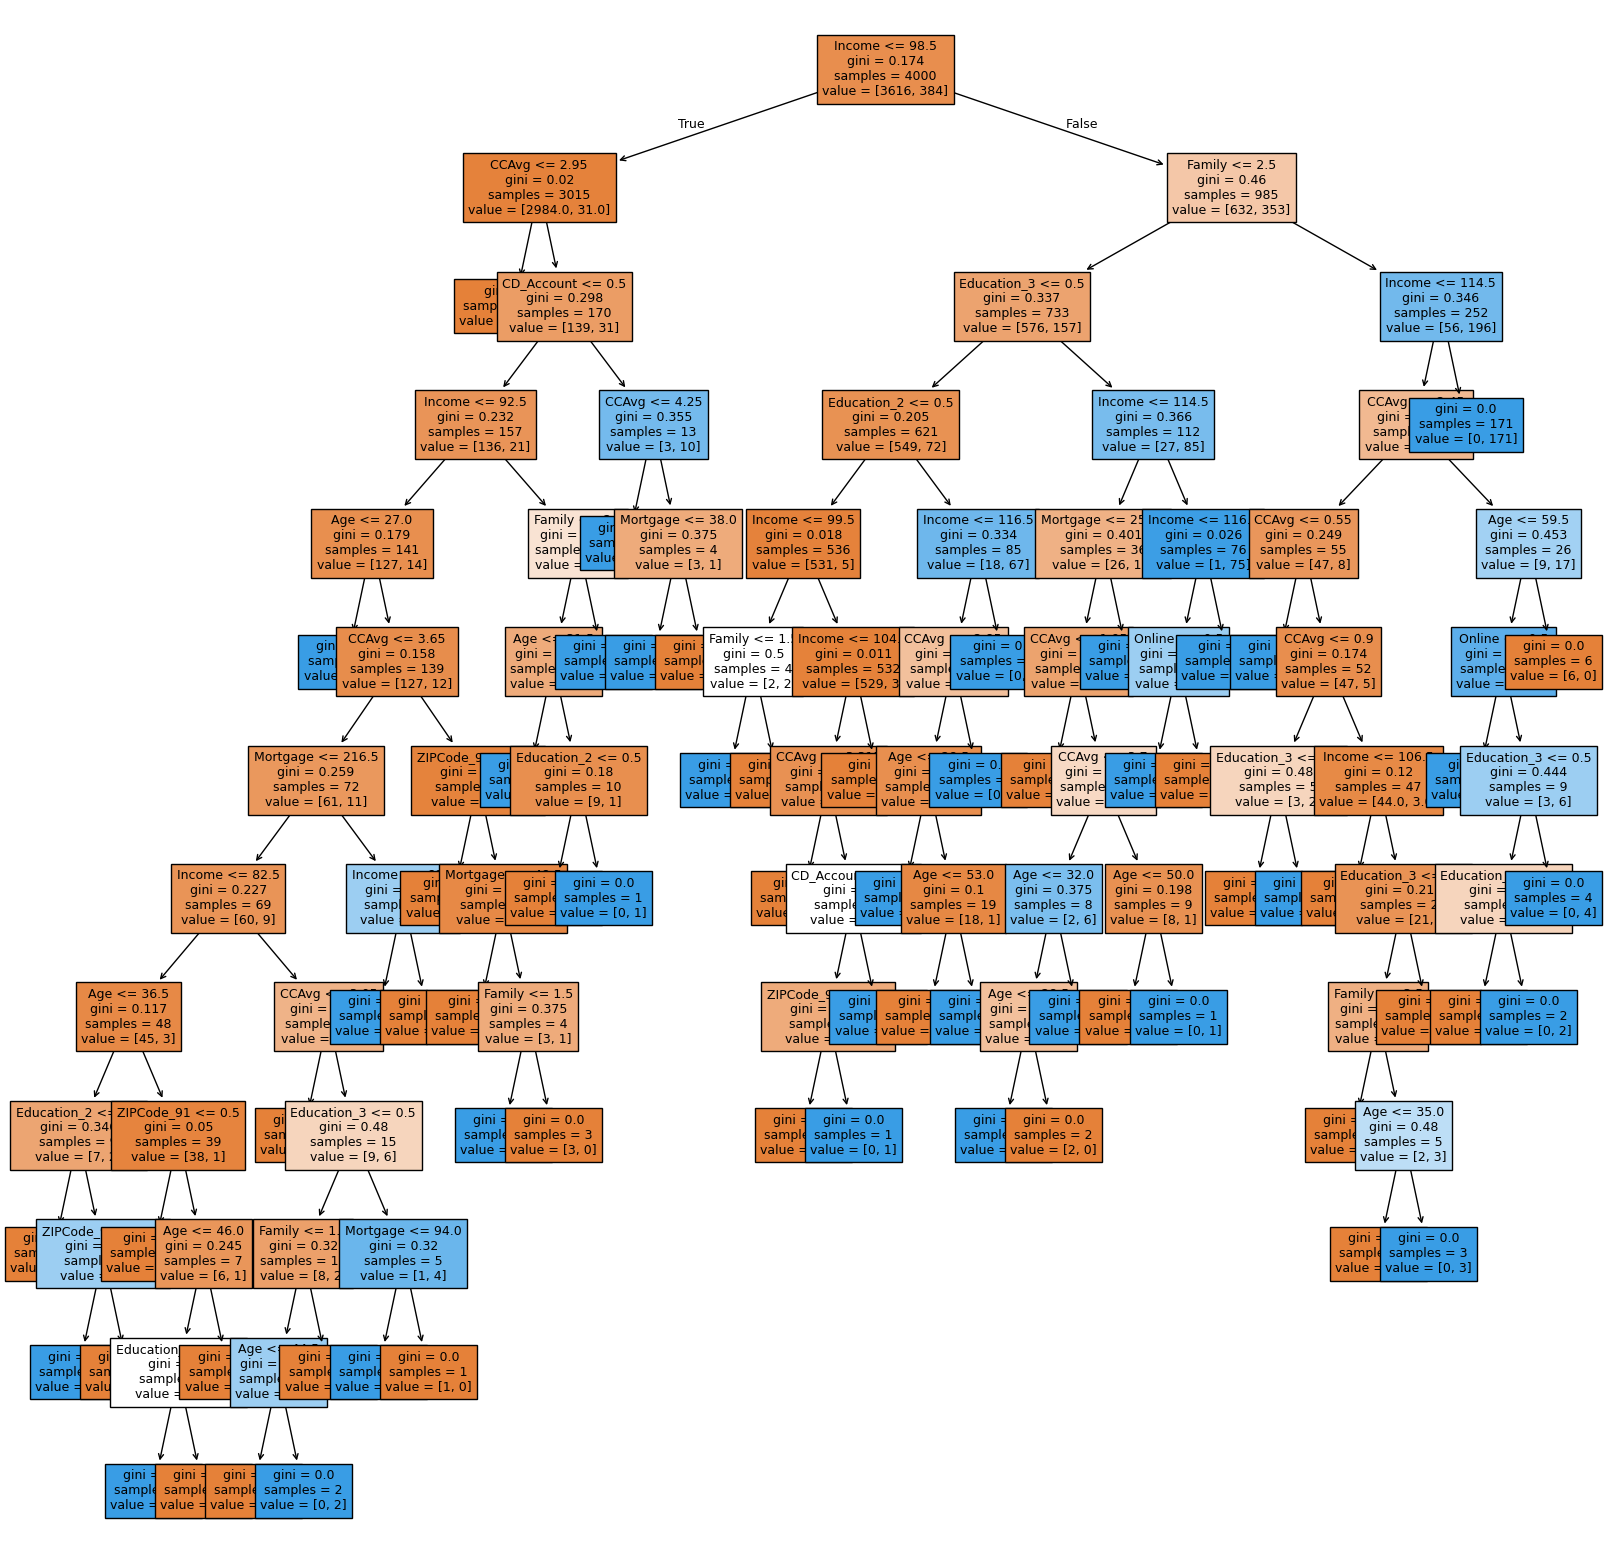

In [359]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [360]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree1,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |

##### **View Performance difference on Training and Test Set**

In [361]:
# Assuming dtree1_train_perf and dtree1_test_perf are the DataFrames you want to combine
combined_metrics_df = pd.concat([dtree1_train_perf, dtree1_test_perf])
combined_metrics_df = combined_metrics_df.rename(index={0: "Train", 1: "Test"}) #Rename the index for better readability
combined_metrics_df

,Accuracy,Recall,Precision,F1 Score
Decision Tree (Train),1.000,1.0000,1.000000,1.000000
Decision Tree (Test),0.981,0.9375,0.873786,0.904523


####**Observations:**

1. Training Set Analysis
    
    * The Decision Tree achieved 100% accuracy on the training data, with perfect precision, recall, and F1 score.
    * The confusion matrix showed no misclassifications, which means the tree memorized the training data.
    * This is a classic case of overfitting, especially for a high-variance model like a decision tree with no depth or leaf constraints.

2. Test Set Analysis
    * Despite overfitting, the model performed exceptionally well on the unseen test data:
    * Accuracy of 98.1% is very strong.
    * Recall (93.8%) indicates it correctly identifies most of the actual personal loan customers — great for minimizing false negatives.
    * Precision (87.4%) shows that when it predicts a customer will take a loan, it’s usually correct — important for marketing efficiency.
    * F1 Score (90.5%) balances precision and recall, confirming overall good predictive power.

3. The model is highly accurate and generalizes well despite being overfit — possibly because the patterns in the data are strong and clean.
Overfitting is evident, so future steps should consider pruning.

### Model Performance Improvement

#### **PrePruned Decision Tree**

In [362]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

In [363]:
# creating an instance of the best model
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(4), max_leaf_nodes=np.int64(20),
                       min_samples_split=np.int64(10), random_state=42)

#####**Checking model performance on training data**

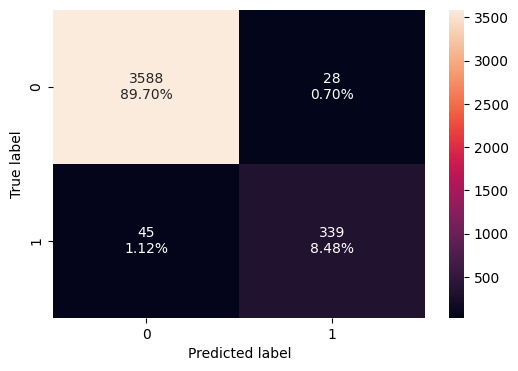

In [364]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [365]:
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)

dtree2_train_perf = dtree2_train_perf.rename(index={0: 'Pre-pruned Tree (Train)'})
dtree2_train_perf

,Accuracy,Recall,Precision,F1 Score
Pre-pruned Tree (Train),0.98175,0.882812,0.923706,0.902796


#####**Checking model performance on test data**

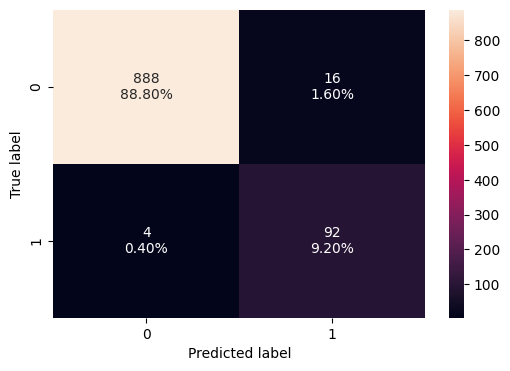

In [366]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [367]:
dtree2_test_perf = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_perf = dtree2_test_perf.rename(index={0: 'Pre-pruned Tree (Test)'})
dtree2_test_perf

,Accuracy,Recall,Precision,F1 Score
Pre-pruned Tree (Test),0.98,0.958333,0.851852,0.901961


##### **Visualizing the Decision Tree**

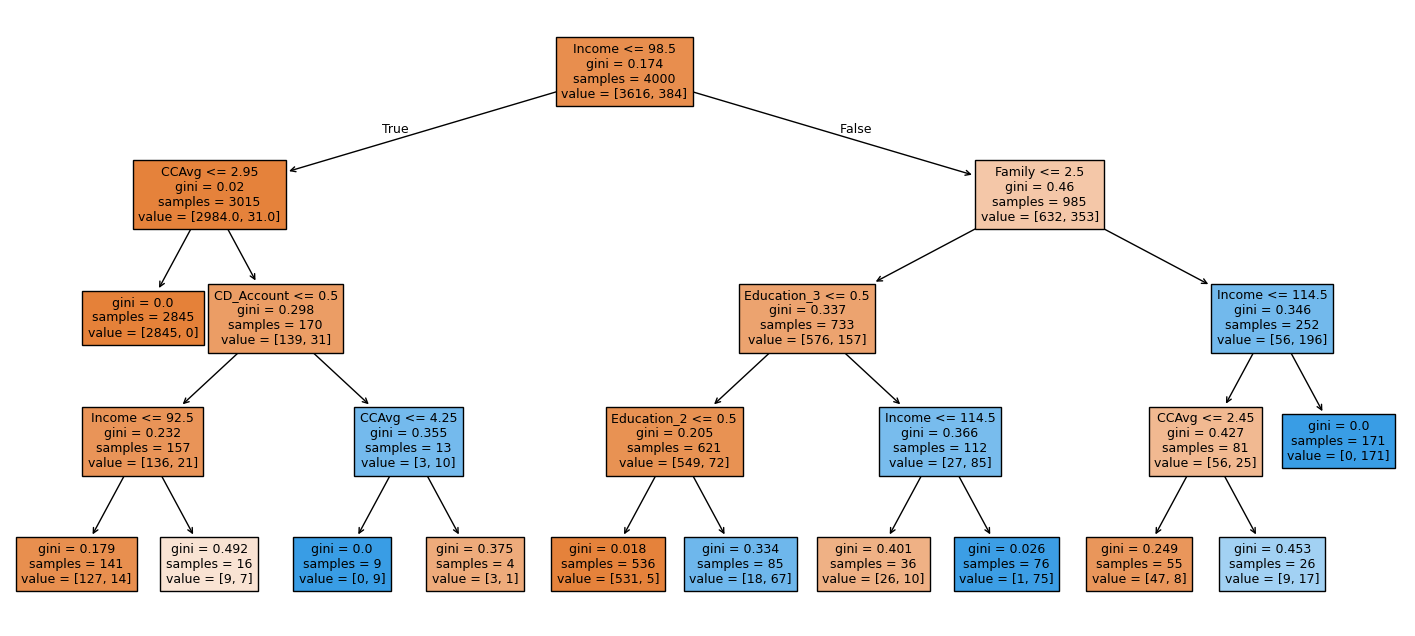

In [400]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(18, 8))

# plotting the decision tree
out = tree.plot_tree(
    dtree2,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [369]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree2,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [127.00, 14.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- weights: [9.00, 7.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- CCAvg <= 4.25
|   |   |   |   |--- weights: [0.00, 9.00] class: 1
|   |   |   |--- CCAvg >  4.25
|   |   |   |   |--- weights: [3.00, 1.00] class: 0
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [531.00, 5.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [18.00, 67.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- Income <= 114.50
|   |   |   |   |--- weights: [26.00, 10.00] class: 0
|   |   |   |--- Income >  114.50
|   |   |   |   |--- weights: [1.00, 75.00] class: 1
|   |--- Family

##### **View Performance difference on Training and Test Set**

In [370]:
# Assuming dtree1_train_perf and dtree1_test_perf are the DataFrames you want to combine
combined_metrics_df = pd.concat([dtree2_train_perf, dtree2_test_perf])
combined_metrics_df

,Accuracy,Recall,Precision,F1 Score
Pre-pruned Tree (Train),0.98175,0.882812,0.923706,0.902796
Pre-pruned Tree (Test),0.98000,0.958333,0.851852,0.901961


####**Observations:**

1. Very high accuracy suggests the model is performing well in both train and test sets.
2. But in imbalanced datasets, accuracy can be misleading, so we need to look deeper into recall, precision, and F1.
3. High recall means the model is very good at identifying actual loan takers. This is crucial for marketing, as we don’t want to miss customers who are likely to say "yes" to a loan.
4. A recall of ~95% in the test set shows excellent generalization.

####**Post Pruned Decision Tree**

In [371]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [372]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000162,0.000487
2,0.000164,0.000980
3,0.000247,0.001473
4,0.000306,0.002392
5,0.000333,0.002726
6,0.000333,0.003059
7,0.000333,0.003392
8,0.000351,0.004796
9,0.000373,0.006288


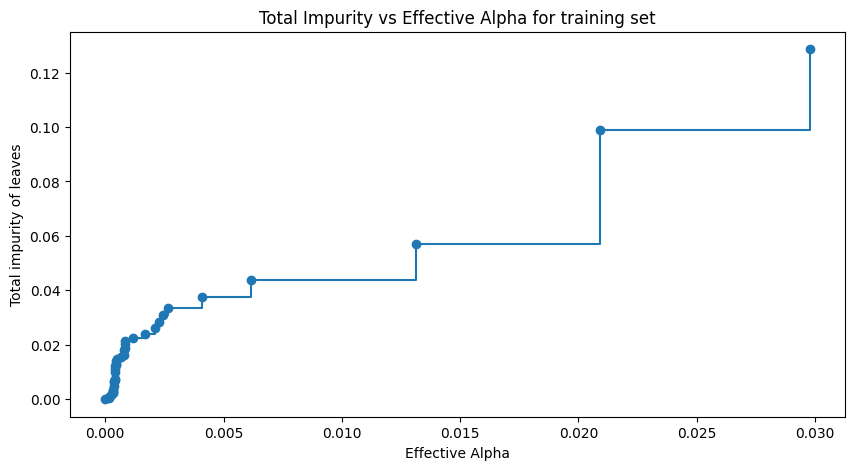

In [373]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

In [374]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.04498066930996447


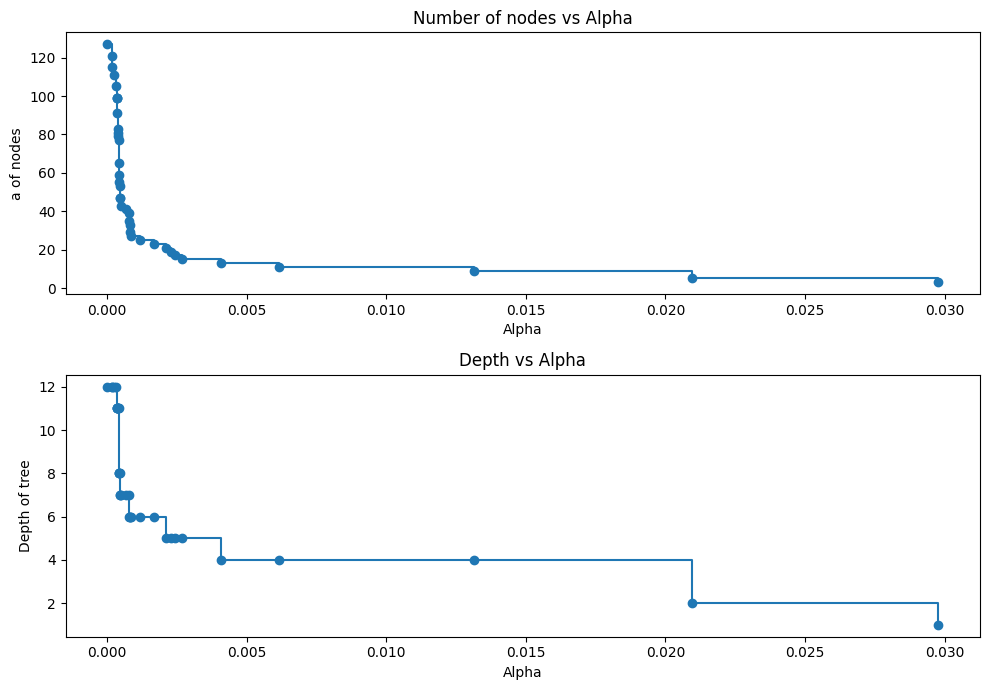

In [375]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("a of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

In [394]:
train_f1_scores = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    f1_train = f1_score(y_train, pred_train)
    train_f1_scores.append(f1_train)

test_f1_scores = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    f1_test = f1_score(y_test, pred_test)
    test_f1_scores.append(f1_test)

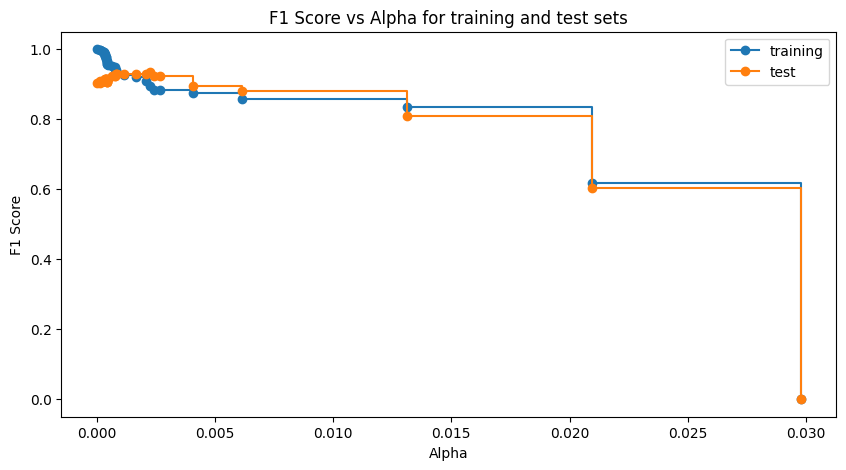

In [396]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

**Observations**

1. F1 scores for both training and test sets generally decrease.
2. Slightly lower F1 scores in the initial region (which is actually good — means less overfitting).
3. The best performance appears around alpha ≈ 0.002–0.005, where the test F1 score is highest and stable.
4. Beyond alpha > 0.015, the model becomes too simple and fails to capture patterns, leading to underfitting.

In [397]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0022814857981524658),
                       random_state=42)


#####**Checking performance on training data**

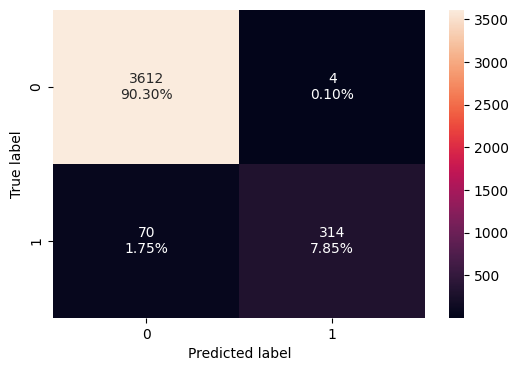

In [379]:
plot_confusion_matrix(dtree3, X_train, y_train)

In [380]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf = dtree3_train_perf.rename(index={0: 'Post-pruned Tree (Train)'})
dtree3_train_perf

,Accuracy,Recall,Precision,F1 Score
Post-pruned Tree (Train),0.9815,0.817708,0.987421,0.894587


#####**Checking performance on test data**

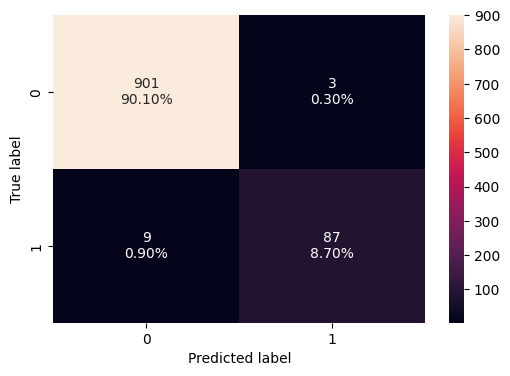

In [381]:
plot_confusion_matrix(dtree3, X_test, y_test)

In [382]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf = dtree3_test_perf.rename(index={0: 'Post-pruned Tree (Test)'})
dtree3_test_perf

,Accuracy,Recall,Precision,F1 Score
Post-pruned Tree (Test),0.988,0.90625,0.966667,0.935484


##### **Visualizing Decision Tree**

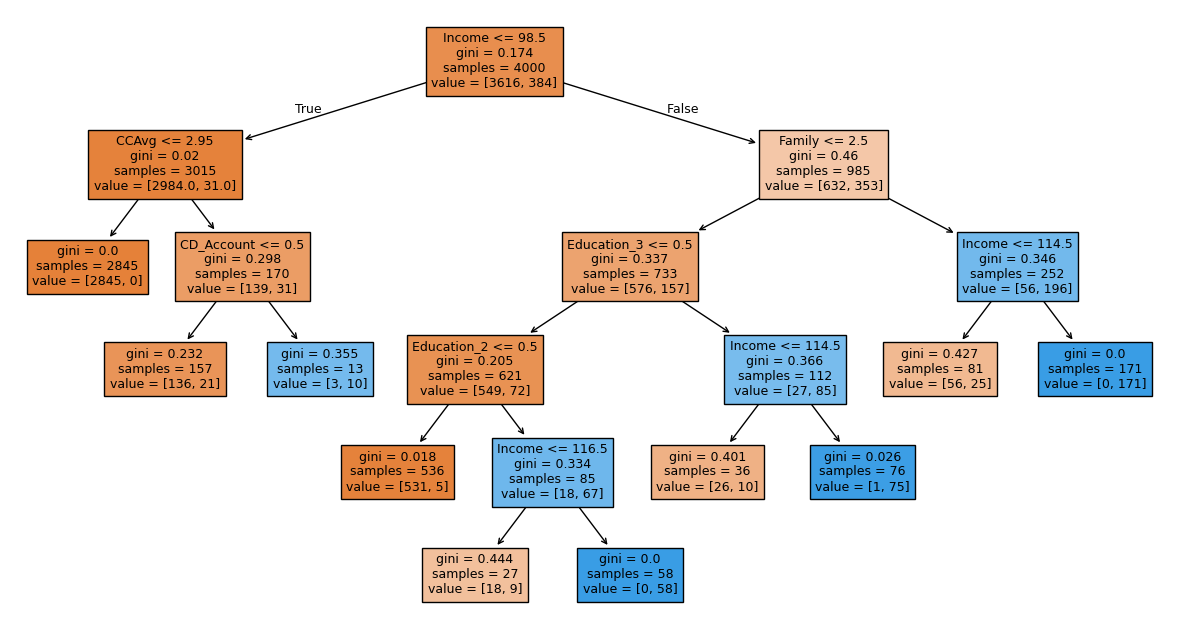

In [398]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(15, 8))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [384]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree3,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [136.00, 21.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [531.00, 5.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 116.50
|   |   |   |   |   |--- weights: [18.00, 9.00] class: 0
|   |   |   |   |--- Income >  116.50
|   |   |   |   |   |--- weights: [0.00, 58.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- Income <= 114.50
|   |   |   |   |--- weights: [26.00, 10.00] class: 0
|   |   |   |--- Income >  114.50
|   |   |   |   |--- weights: [1.00, 75.00] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 114.50
|   |   |   |--- weights: [56.00, 25.00] class: 0
|   |   |--- I

##### **View Performance difference on Training and Test Set**

In [385]:
# Assuming dtree1_train_perf and dtree1_test_perf are the DataFrames you want to combine
combined_metrics_df = pd.concat([dtree3_train_perf, dtree3_test_perf])
combined_metrics_df

,Accuracy,Recall,Precision,F1 Score
Post-pruned Tree (Train),0.9815,0.817708,0.987421,0.894587
Post-pruned Tree (Test),0.9880,0.906250,0.966667,0.935484


####**Observations:**

1. Test Accuracy (98.8%) increased compared to pre-pruning , while Train Accuracy (98.15%) slightly decreased.
3. This shows the post-pruned tree is simpler, more generalizable, and less overfit than the pre-pruned version.
4. Pruning helped reduce variance without losing much accuracy.
5. The post-pruned tree is more balanced and effective on unseen data – it retains high recall while boosting precision, leading to an overall stronger F1.

####**Feature Importance**

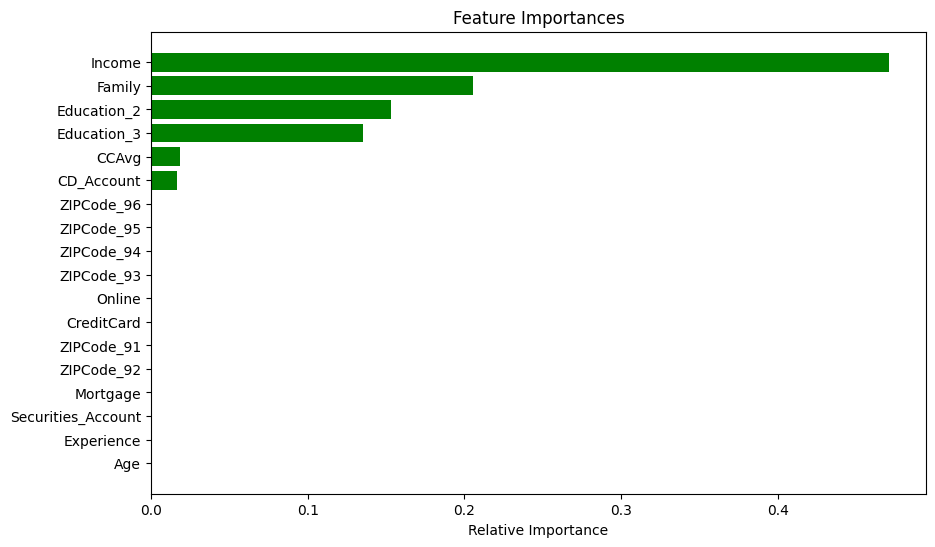

In [386]:
# importance of features in the tree building
importances = dtree3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="Green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

The top 3 most important features were:

1. **Income** – Strongest predictor of loan interest.
2. **Education** – Suggests that higher education levels might influence loan uptake.
3. **Family** – Could indicate household size or responsibilities, influencing financial needs.
4. **CCAvg** - Could indicate customers with high CCAvg have more chances to take up loans and get approved.
5. Features like CreditCard and Securities_Account contributed very little, possibly because their correlation with loan decisions is weak.

## Model Performance Comparison and Final Model Selection

In [387]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.981750,0.981500
Recall,1.0,0.882812,0.817708
Precision,1.0,0.923706,0.987421
F1 Score,1.0,0.902796,0.894587


**Observations:**

1. **Default Decision Tree: Perfect on Train = Overfitting**
    * All metrics are 1.0 — perfect fit to training data.
    * While it looks ideal, it’s a strong indicator of overfitting.
    * The tree is very deep and complex, capturing noise and outliers.
    * Not recommended for generalization despite ideal training metrics.


2. **Pre-Pruned Tree: Slight Regularization**
    * Accuracy: 98.17%, Recall: 88.28%, Precision: 92.3%
    * Recall remains reasonably high — it can capture most true loan takers, which is good for outreach campaigns.
    * Slightly lower precision than the post-pruned model means a few more false positives, but still a good trade-off.
    * F1 score (90.28%) shows solid balance.
    

3. **Post-Pruned Tree: Most Regularized**
    * Highest precision (98.74%) — this model very rarely misclassifies non-loan-takers as loan-takers.
    * However, recall drops to 81.8% — it may miss some actual loan takers due to the stricter rules after pruning.
    * F1 Score is slightly below pre-pruned but still competitive (89.46%), indicating overall effectiveness.
    * Ideal when cost of false positives is high — for instance, if outreach efforts are expensive.

In [388]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.981000,0.980000,0.988000
Recall,0.937500,0.958333,0.906250
Precision,0.873786,0.851852,0.966667
F1 Score,0.904523,0.901961,0.935484


**Observations:**

1. **Default Tree: Balanced but Risk of Overfitting**
    * Despite perfect train metrics, test scores drop:
        * Recall = 93.8% (still strong)
        * Precision = 87.4%, significantly lower than others
        * F1 Score (90.5%) is the lowest among the three
    * Still decent test performance, but earlier training metrics showed clear overfitting.


2. **Pre-Pruned Tree: Good Middle Ground**
    * Highest recall = 95.8%, meaning it captures nearly all actual loan takers.
    * However, precision is lowest = 85.2%, indicating more false positives.
    * Best suited for broad-based, low-cost marketing campaigns where maximizing reach is the goal.
    

3. **Post-Pruned Tree Is the Best Generalizer**
    * Accuracy = 98.8%, Precision = 96.7%, F1 = 93.5%
    * Lower recall (90.6%) than other models — it’s a more conservative model.
    * It sacrifices some true positives to minimize false positives, making it highly reliable for resource-intensive outreach.
    * Ideal when quality of prediction > quantity of outreach.


4. **We should move ahead with Post Pruning** as final model because:

  * **Highest Accuracy (0.988)** – Excellent overall predictive power
  * **Best Precision (0.97)** – Highly reliable when predicting "yes"
  * **Highest F1 Score (0.94)** – Best balance of precision and recall
  * **Smaller, simpler tree** – Easier to interpret and extract customer segments.

  Even though recall is slightly lower, this is acceptable if the bank prioritizes cost-effective targeting (fewer false positives) and high-confidence leads.


# Actionable Insights and Business Recommendations


## **Business Insights**

1. **Loan Acceptance is Highly Predictable**
    * All models cross 90% F1 on test data — signals that the model can reliably identify loan acceptors.
    * Enables the bank to predict customer behavior with strong confidence and plan marketing accordingly.


2. **Precision vs. Recall Tradeoff Must Align with Campaign Goals**

    * Post-pruned model: Avoids wasting offers — best when marketing cost is high.
    * Pre-pruned model: Catches almost all potential takers — best for high-volume/low-cost channels.
    

3. **Pruning Improves Real-World Readiness**
    * Compared to default, both pruned trees show better generalization.
    * Model complexity reduction improves robustness, stability, and explainability.

## **Strategic Recommendations for the Bank**

1. **Adopt the Post-Pruned Decision Tree Model for Targeting**
    * The post-pruned decision tree offers the best balance between precision (96.7%) and F1 score (93.5%), ensuring accurate targeting with minimal false positives.
    * This model should serve as the core engine for identifying customers most likely to accept personal loan offers.


2. **Segment Customers Based on Predicted Loan Propensity**
    * Use the model's output to classify customers into high, medium, and low propensity segments.
    * Tailor the marketing approach accordingly, with personalized offers for high scorers and educational or passive strategies for others.


3. **Optimize Marketing Channels Based on Customer Segment**
    * Engage high-propensity customers through costlier but effective channels like phone calls, pre-approved SMS, or mobile app banners.
    * Use low-cost digital channels (email, push notifications) for medium scores and avoid active outreach to low-propensity segments.


4. **Automate Lead Scoring and Offer Triggering**
    * Integrate the model into the bank’s CRM to automatically assign a loan propensity score to each customer.
    * Use these scores to dynamically trigger offers, update dashboards, or support banker-assisted recommendations.


5. **Monitor Campaign Performance and Retrain the Model Regularly**
    * Track key metrics like conversion rates, precision, and recall to evaluate the model’s business impact.
    * Schedule model retraining on a regular basis (e.g., quarterly or semi-annually) to adapt to changing customer behavior and market trends.


6. **High Precision Indicates Strong Patterns Among Likely Loan Takers**
    * The post-pruned model achieved 96.7% precision, meaning the model can confidently identify customers who actually accept personal loans.
    * This suggests there are consistent and identifiable traits in loan-accepting customers — likely involving factors such as:
      * Higher income
      * Existing credit card ownership
      * Longer account tenure
      * Active digital banking usage


7. **Create feature-driven segmentation, where campaigns are designed around top predictors**:
      * “High-income professionals” → offer large loans with longer tenures
      * “Digital-first users” → promote 100% paperless loan journeys
      * “Tenured customers” → reward loyalty with interest rate reductions


8. **The model doesn’t just predict — it uncovers customer behavior patterns that the bank can use to**:

  * Refine loan product design to match what different segments want and need.
  * Craft more personalized and persuasive marketing campaigns.
  * Target the right audience with the right message through the right channel.

The models above tested help predict which liability customers are likely to buy a personal loan. Based on the performance metrics and typical customer behavior patterns

___